In [97]:
import json
import numpy as np
import pandas as pd

In [98]:
path = "2023_05_09_09:02:40/result_0.json"

with open('../EvolutionaryFramework/results/MOEA_D/' + path) as user_file:
  parsed_json = json.load(user_file)
  
# print(json.dumps(parsed_json, indent = 4, sort_keys=True))

In [99]:
data = []
metaParameters = []
for elem in parsed_json:
    if elem == "metaParameters":
        metaParameters.append({
            'algorithmName': parsed_json[elem]["algorithmName"],
            'populationSize': parsed_json[elem]["populationSize"],
            'numberOfBars': parsed_json[elem]["numberOfBars"],
            'maxNumberOfNotes': parsed_json[elem]["maxNumberOfNotes"],
            'representationType': parsed_json[elem]["representationType"],
            'melodyKeyValue': parsed_json[elem]["melodyKeyValue"],
            'melodyKeyType': parsed_json[elem]["melodyKeyType"],
            'crossoverType': parsed_json[elem]["crossoverType"],
            'mutationType': parsed_json[elem]["mutationType"],
            'mutationProbability': parsed_json[elem]["mutationProbability"],
            'selectionType': parsed_json[elem]["selectionType"],
            'matingPoolSelectionType': parsed_json[elem]["matingPoolSelectionType"],
            'numberOfGenerations': parsed_json[elem]["numberOfGenerations"],
            'criteria': parsed_json[elem]["criteria"],
            'numberOfNeighbours': parsed_json[elem]["numberOfNeighbours"]
        })
metaParameters_df = pd.DataFrame(metaParameters)   


for elem in parsed_json:
        if elem == "experiment":
            for generation in parsed_json[elem]:
                for individual in parsed_json[elem][generation]:
                    dictionary = {}
                    dictionary = {
                        'generation': generation,
                        'melody': individual['melody'],
                    }
                    for criterion in metaParameters_df['criteria'].values[0]:
                        dictionary[criterion] = individual['fitness'][criterion]
                    data.append(dictionary)
data_df = pd.DataFrame(data)

In [100]:
data_df.head()

,generation,melody,STABILITY,TENSION
0,generation_2601,71/0.0625 72/0.0625 74/0.0625 71/0.0625 72/0.2...,83.75,103.4375
1,generation_2601,71/0.0625 72/0.0625 74/0.0625 71/0.0625 72/0.2...,83.75,103.4375
2,generation_2601,71/0.0625 72/0.0625 74/0.0625 71/0.0625 72/0.2...,83.75,103.4375
3,generation_2601,71/0.0625 72/0.0625 74/0.0625 71/0.0625 72/0.2...,83.75,103.4375
4,generation_2601,71/0.0625 72/0.0625 74/0.0625 71/0.0625 72/0.2...,83.75,103.4375


In [101]:
metaParameters_df.head()

,algorithmName,populationSize,numberOfBars,maxNumberOfNotes,representationType,melodyKeyValue,melodyKeyType,crossoverType,mutationType,mutationProbability,selectionType,matingPoolSelectionType,numberOfGenerations,criteria,numberOfNeighbours
0,MOEA/D,100,4,16,f1,C,MAJOR,ONE_POINT_CROSSOVER,SIMPLE,0.8,,,10000,"[STABILITY, TENSION]",25


In [102]:
data_df.head()

,generation,melody,STABILITY,TENSION
0,generation_2601,71/0.0625 72/0.0625 74/0.0625 71/0.0625 72/0.2...,83.75,103.4375
1,generation_2601,71/0.0625 72/0.0625 74/0.0625 71/0.0625 72/0.2...,83.75,103.4375
2,generation_2601,71/0.0625 72/0.0625 74/0.0625 71/0.0625 72/0.2...,83.75,103.4375
3,generation_2601,71/0.0625 72/0.0625 74/0.0625 71/0.0625 72/0.2...,83.75,103.4375
4,generation_2601,71/0.0625 72/0.0625 74/0.0625 71/0.0625 72/0.2...,83.75,103.4375


In [103]:
data_df.loc[0]

generation                                      generation_2601
melody        71/0.0625 72/0.0625 74/0.0625 71/0.0625 72/0.2...
STABILITY                                                 83.75
TENSION                                                103.4375
Name: 0, dtype: object

In [104]:
generation = data_df[data_df["generation"] == "generation_1000"]

In [105]:
list_of_fronts = []
for criterion in metaParameters_df['criteria'].values[0]:
    criterion_individuals = []
    for individual in generation[criterion]:
        criterion_individuals.append(individual)
    list_of_fronts.append(criterion_individuals)


In [106]:
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

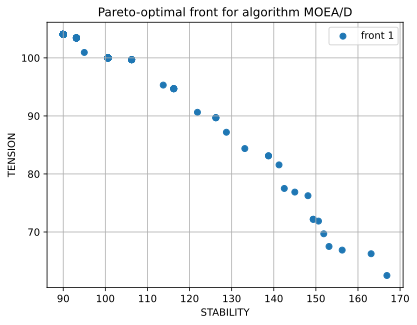

In [110]:
fig, ax = plt.subplots()
ax.set_title("Pareto-optimal front for algorithm MOEA/D")
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):
    if i == 0:
        ax.set_xlabel(criterion)
    else:
        ax.set_ylabel(criterion)
ax.grid()


ax.scatter(list_of_fronts[0], list_of_fronts[1], label = f"front 1")

plt.legend()
plt.show()


In [108]:
from natsort import index_natsorted
list_of_generations = []
data_df = data_df.sort_values(by=['generation'], key = lambda x: np.argsort(index_natsorted(data_df["generation"])))
for generation_name in data_df["generation"].unique():
    list_of_fronts = []
    generation = data_df[data_df["generation"] == generation_name]
    print(generation_name)
    for criterion in metaParameters_df['criteria'].values[0]:
        criterion_individuals = []
        for individual in generation[criterion]:
            criterion_individuals.append(individual)
        list_of_fronts.append(criterion_individuals)
    list_of_generations.append(list_of_fronts)

average_generations = np.zeros((len(list_of_generations), len(metaParameters_df['criteria'].values[0])))

for idx, elem in enumerate(list_of_generations):
    temp = np.zeros(len(metaParameters_df['criteria'].values[0]))
    for i, criterion in enumerate(elem):
        temp[i] = np.average(criterion) 
    average_generations[idx] = temp 

print(average_generations)



generation_0
generation_1
generation_101
generation_201
generation_301
generation_401
generation_501
generation_601
generation_701
generation_801
generation_901
generation_1001
generation_1101
generation_1201
generation_1301
generation_1401
generation_1501
generation_1601
generation_1701
generation_1801
generation_1901
generation_2001
generation_2101
generation_2201
generation_2301
generation_2401
generation_2501
generation_2601
generation_2701
generation_2801
generation_2901
generation_3001
generation_3101
generation_3201
generation_3301
generation_3401
generation_3501
generation_3601
generation_3701
generation_3801
generation_3901
generation_4001
generation_4101
generation_4201
generation_4301
generation_4401
generation_4501
generation_4601
generation_4701
generation_4801
generation_4901
generation_5001
generation_5101
generation_5201
generation_5301
generation_5401
generation_5501
generation_5601
generation_5701
generation_5801
generation_5901
generation_6001
generation_6101
generat

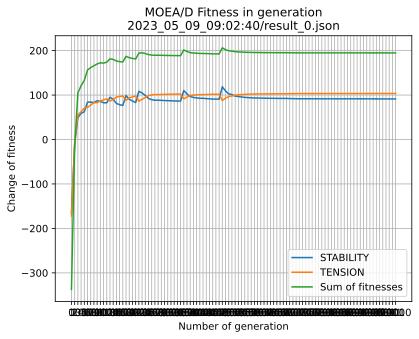

In [109]:
X = data_df["generation"].unique()
for i, elem in enumerate(X):
    X[i] = elem[11:]


fig, ax = plt.subplots()
ax.set_title("MOEA/D Fitness in generation\n" + path)
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):  
    ax.plot(X, average_generations[:,i], label=criterion)
        
ax.plot(X, average_generations[:,0] + average_generations[:,1], label="Sum of fitnesses")

ax.set_xlabel("Number of generation")
ax.set_ylabel("Change of fitness")

ax.grid()

plt.legend()
plt.show()